# Centralizing the Data Vizualizations from the Paper

In [7]:
# dependencies
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

import emission.core.get_database as edb
from plots import *
import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [8]:
year = None
month = None
program = "prepilot"
study_type = "program"
mode_of_interest = "pilot_ebike"

## access data from database

In [9]:
# Access database
tq = scaffolding.get_time_query(year, month)
## I EDITED SCAFFOLDING TO REMOVE STAGE INSTEAD OF TEST
participant_ct_df = scaffolding.load_all_participant_trips(program, tq, load_test_users=False) 
participant_ct_df["user_id_str"] = participant_ct_df.user_id.apply(lambda u: str(u))

0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

88     4c_Ze5Y_li7r4MOsbqj
89     4c_AGgrHoywg5gYmyL8
90     4c_Ri332Xj3DKaCrdwl
91     4c_6gzfgbVUODrbTdc_
92     4c_eJEIg2mWQYU3ISXU
              ...         
279      prepilot_rhBZukxY
280      prepilot_k36cxmfA
281      prepilot_FmxVf8u6
282      prepilot_pNpK4pFg
283      prepilot_F3jxHLSW
Name: user_email, Length: 196, dtype: object

Loaded all confirmed trips of length 241123


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,additions
0,DwellSegmentationDistFilter,1.629238e+09,2021-08-17T18:02:26.493017-04:00,"{'type': 'Point', 'coordinates': [-71.08788681...",611c350df3bfdd5663c34e52,1.629237e+09,2021-08-17T17:51:32.998732-04:00,"{'type': 'Point', 'coordinates': [-71.11831245...",653.494285,2700.231495,...,17,18,2,26,1,America/New_York,611fdd6f1c25a2c3dbf7c5be,8a0473ca-e53d-4720-a99c-0696cc1fb407,1.629478e+09,NaN
1,DwellSegmentationTimeFilter,1.628682e+09,2021-08-11T13:39:44.936000+02:00,"{'type': 'Point', 'coordinates': [33.7674264, ...",6113bf6009f3390d387bb211,1.628682e+09,2021-08-11T13:33:51+02:00,"{'type': 'Point', 'coordinates': [33.7754756, ...",353.936000,1368.259843,...,11,13,39,44,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cb,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
2,DwellSegmentationTimeFilter,1.628684e+09,2021-08-11T14:06:11.774000+02:00,"{'type': 'Point', 'coordinates': [33.7595711, ...",6113cd7024f71bcfb27d7c5d,1.628682e+09,2021-08-11T13:42:44.936000+02:00,"{'type': 'Point', 'coordinates': [33.7674264, ...",1406.838000,944.948370,...,11,14,6,11,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cc,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
3,DwellSegmentationTimeFilter,1.628686e+09,2021-08-11T14:49:37.923000+02:00,"{'type': 'Point', 'coordinates': [33.7673488, ...",6113cd7024f71bcfb27d7c5f,1.628684e+09,2021-08-11T14:09:11.774000+02:00,"{'type': 'Point', 'coordinates': [33.7595711, ...",2426.149000,935.565727,...,11,14,49,37,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cd,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
4,DwellSegmentationTimeFilter,1.628688e+09,2021-08-11T15:11:54.772000+02:00,"{'type': 'Point', 'coordinates': [33.7643828, ...",6114ca95c783b3519ce45faa,1.628687e+09,2021-08-11T15:05:28.344737+02:00,"{'type': 'Point', 'coordinates': [33.7673488, ...",386.427263,1398.167487,...,11,15,11,54,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116ce,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN


After filtering, found 203821 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,additions
37302,DwellSegmentationTimeFilter,1.626885e+09,2021-07-21T10:31:16-06:00,"{'type': 'Point', 'coordinates': [-107.8599774...",60f85d2453f7233da0b1a28c,1.626884e+09,2021-07-21T10:13:12.769000-06:00,"{'type': 'Point', 'coordinates': [-107.8579336...",1083.231000,9413.891182,...,21,10,31,16,2,America/Denver,612089e1cb13df1d4d22cfd9,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37303,DwellSegmentationTimeFilter,1.626920e+09,2021-07-21T20:05:41.808000-06:00,"{'type': 'Point', 'coordinates': [-107.8643886...",60f8dbb173697eb577aaff42,1.626918e+09,2021-07-21T19:38:56.389000-06:00,"{'type': 'Point', 'coordinates': [-107.7964539...",1605.419000,13124.152280,...,21,20,5,41,2,America/Denver,612089e1cb13df1d4d22cfda,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37304,DwellSegmentationTimeFilter,1.626971e+09,2021-07-22T10:15:32.259000-06:00,"{'type': 'Point', 'coordinates': [-107.860199,...",60f9aea3f399df93fdc1ab41,1.626969e+09,2021-07-22T09:51:21.159484-06:00,"{'type': 'Point', 'coordinates': [-107.8643886...",1451.099516,10587.088615,...,22,10,15,32,3,America/Denver,612089e1cb13df1d4d22cfdb,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37305,DwellSegmentationTimeFilter,1.626989e+09,2021-07-22T15:21:31-06:00,"{'type': 'Point', 'coordinates': [-107.8743952...",60f9f4f122abd49191e21f5c,1.626988e+09,2021-07-22T15:14:35.056996-06:00,"{'type': 'Point', 'coordinates': [-107.860199,...",415.943004,3362.028245,...,22,15,21,31,3,America/Denver,612089e1cb13df1d4d22cfdc,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37306,DwellSegmentationTimeFilter,1.626990e+09,2021-07-22T15:32:52.960000-06:00,"{'type': 'Point', 'coordinates': [-107.8601932...",60f9f4f122abd49191e21f5e,1.626989e+09,2021-07-22T15:24:53.289799-06:00,"{'type': 'Point', 'coordinates': [-107.8743952...",479.670201,4084.311560,...,22,15,32,52,3,America/Denver,612089e2cb13df1d4d22cfdd,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN


In [10]:
# Proportion of trips labeled by user
data = pd.read_csv("trip_program.csv") ##all the labeled trips
data = data[data.program != 'stage']
data.user_id_str.nunique()

all_user_trips = participant_ct_df.groupby(['user_id_str'], as_index=False).count()[['user_id_str','distance']]
print(len(all_user_trips))

print(data.program.unique())
labeled_user_trips = data.groupby(['user_id_str'], as_index=False).count()[['user_id_str','distance']]
print(len(labeled_user_trips))
# print(labeled_user_trips.program.unique())

plot_data = all_user_trips.merge(labeled_user_trips, how='right', on='user_id_str').fillna(0)
plot_data.head()

183
['4c' 'cc' 'fc' 'pc' 'sc' 'vail' 'prepilot']
176


,user_id_str,distance_x,distance_y
0,0154d714-3928-4c34-b865-e5a417cd48af,2104,276
1,03a395b4-d861-4757-bb84-32b4984559b0,1625,263
2,0958519b-b4a6-4498-b824-015917eec592,18,17
3,0b3e78fa-91d8-4aa6-a320-3440143c8c16,2430,2315
4,0d0ae3a5-5641-4d13-8c52-a6040a203d24,1059,2


176


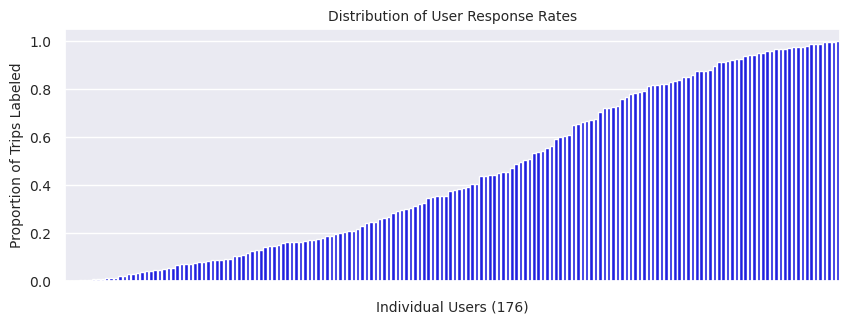

In [11]:
plot_data['proportion'] = plot_data['distance_y'] / plot_data['distance_x']
data_order = plot_data.sort_values('proportion', ascending=True).user_id_str
print(len(plot_data))

plot_title='Distribution of User Response Rates'
ylab='Proportion of Trips Labeled'
file_name='CanBikeCO_report_user_participation%s'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='user_id_str', y='proportion', order=data_order, color='blue').set(title=plot_title,xlabel='Individual Users (176)',ylabel=ylab,xticklabels=[])
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpg", bbox_inches='tight')

In [12]:
#group the total data by day
all_data = (participant_ct_df.groupby(['start_local_dt_month', 'start_local_dt_year']).size() 
   .reset_index(name='count'))

all_data = all_data.sort_values(['start_local_dt_year', 'start_local_dt_month'])

all_data = all_data.astype({'start_local_dt_month': 'str'})
all_data = all_data.astype({'start_local_dt_year': 'str'})
all_data['Month'] = all_data[['start_local_dt_year', 'start_local_dt_month']].agg('-'.join, axis=1)


#group the labeled data by day#group the total data by day
labeled = (data.groupby(['start_local_dt_month', 'start_local_dt_year']).size() 
   .reset_index(name='count'))

labeled = labeled.sort_values(['start_local_dt_year', 'start_local_dt_month'])

labeled = labeled.astype({'start_local_dt_month': 'str'})
labeled = labeled.astype({'start_local_dt_year': 'str'})
labeled['Month'] = labeled[['start_local_dt_year', 'start_local_dt_month']].agg('-'.join, axis=1)


#merge them
plot_data = all_data.merge(labeled, how='left', on='Month').fillna(0)

#calc the proportion
plot_data['proportion'] = plot_data['count_y'] / plot_data['count_x']

#drop data before 6/2022 (when the full pilot started)
plot_data = plot_data.iloc[5:]
plot_data

,start_local_dt_month_x,start_local_dt_year_x,count_x,Month,start_local_dt_month_y,start_local_dt_year_y,count_y,proportion
5,6,2021,309,2021-6,6,2021,203,0.656958
6,7,2021,5143,2021-7,7,2021,3431,0.667120
7,8,2021,10016,2021-8,8,2021,5799,0.578974
8,9,2021,9626,2021-9,9,2021,4924,0.511531
9,10,2021,12781,2021-10,10,2021,6508,0.509193
10,11,2021,12319,2021-11,11,2021,5739,0.465866
11,12,2021,12976,2021-12,12,2021,5273,0.406366
12,1,2022,10427,2022-1,1,2022,4427,0.424571
13,2,2022,10234,2022-2,2,2022,4085,0.399160
14,3,2022,11849,2022-3,3,2022,4917,0.414972


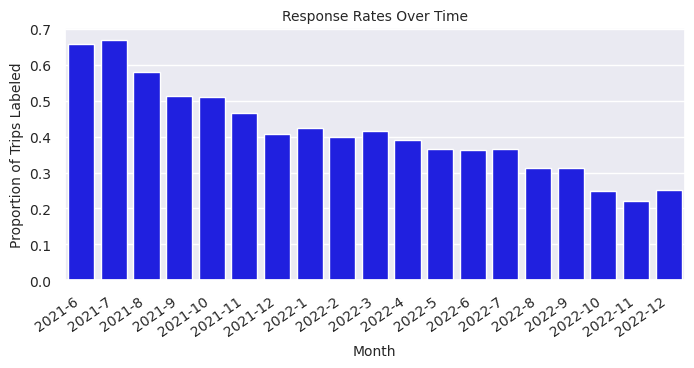

In [13]:
#graph it - bar way -- making no connect the dots claims :)

plot_title='Response Rates Over Time'
ylab='Proportion of Trips Labeled'
file_name='CanBikeCO_report_ts_labels'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=plot_data, x='Month', y='proportion', color='blue').set(title=plot_title,xlabel='Month',ylabel=ylab)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpeg", bbox_inches='tight')

# bar_data = plot_data[['Month', 'proportion']]

# ax = bar_data.plot.bar(title='Response Rates Over Time', 
#                         ylabel='Proportion of Trips Labeled',
#                         xlabel = 'Month')

# ax.set_xticklabels(plot_data.Month, rotation=45, ha='right')
# ax.get_legend().remove()

# plt.savefig("CanBikeCO_report_ts_labels.jpeg", bbox_inches='tight')

## Loading from CSV way

In [2]:
# loading the data
data = pd.read_csv("filtered_merged_trips.csv")

/tmp/ipykernel_42/3633409825.py:2: DtypeWarning: Columns (66,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("filtered_merged_trips.csv")


In [3]:
# Summary statistics table #MOVE TO ANALYSIS NOTEBOOK
mode_of_interest = 'E-bike'
data_eb = data.query(f"mode_confirm == '{mode_of_interest}'")
print(len(pd.unique(data.user_id)))
stat_data = data[['distance_miles','duration']]
stat_data.describe()

122


,distance_miles,duration
count,61496.000000,61496.000000
mean,3.933690,24.145146
std,5.991457,30.691071
min,0.062013,0.000068
25%,0.721590,9.173613
50%,1.983511,15.289998
75%,4.342240,28.071609
max,49.929320,479.495935


## Modes in Mini vs Full Pilot

Figure 6 in the paper

In [5]:
# processing mini data
mini_data = pd.read_csv("trip_program.csv")
mini_data = mini_data[mini_data.program == 'prepilot']
print(len(mini_data))
MINI_DATA = mini_data.copy() #saving a copy for later

# Combine variable categories
mini_data = mini_data.replace('Gas Car, drove alone', 'Car')
mini_data = mini_data.replace('Gas Car, with others', 'Shared Car')
mini_data = mini_data.replace('Bikeshare', 'Shared Micromobility')
mini_data = mini_data.replace('Scooter share', 'Shared Micromobility')
mini_data = mini_data.replace('Regular Bike', 'Personal Micromobility')
mini_data = mini_data.replace('Skate board', 'Personal Micromobility')
mini_data = mini_data.replace('Train', 'Transit')
mini_data = mini_data.replace('Free Shuttle', 'Transit')
mini_data = mini_data.replace('Bus', 'Transit')
mini_data = mini_data.replace('Walk', 'Walk')
mini_data = mini_data.replace('Taxi/Uber/Lyft', 'Ridehail')
mini_data = mini_data.replace('Pilot ebike', 'E-Bike')

#filter out 'not a trip' trips
mini_data = mini_data[~mini_data['Mode_confirm'].isin(['Not a Trip'])]
mini_data = mini_data[~mini_data['Replaced_mode'].isin(['Not a Trip'])]
mini_data = mini_data[~mini_data['Trip_purpose'].isin(['not_a_trip'])]

print(len(mini_data))

2374
2323


In [27]:
mini_data.loc[mini_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
mini_data.loc[mini_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = mini_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip_type'] = 'All Trips'

t2 = mini_data[mini_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip_type'] = 'Work Trips'
t2.loc[1.5] = 'Other', 0, 0, 'Work Trips'
t2 = t2.sort_index().reset_index(drop=True)

mini_data = pd.concat([t1,t2])
mini_data['Dataset'] = 'Minipilot'
mini_data.columns = ['Mode','Count','Proportion','Trip Type', "Dataset"]

# processing long data
plot_data = data.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip_type'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip_type'] = 'Work Trips'

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Mode','Count','Proportion','Trip Type', "Dataset"]

plot_data = pd.concat([plot_data, mini_data])
plot_data

,Mode,Count,Proportion,Trip Type,Dataset
0,Car,15763,0.256326,All Trips,Long Term
1,E-bike,17348,0.282100,All Trips,Long Term
2,Other,2127,0.034588,All Trips,Long Term
3,Ridehail,324,0.005269,All Trips,Long Term
4,Shared Car,14680,0.238715,All Trips,Long Term
5,Transit,1396,0.022701,All Trips,Long Term
6,Walk,9858,0.160303,All Trips,Long Term
0,Car,3758,0.282939,Work Trips,Long Term
1,E-bike,5959,0.448652,Work Trips,Long Term
2,Other,339,0.025523,Work Trips,Long Term


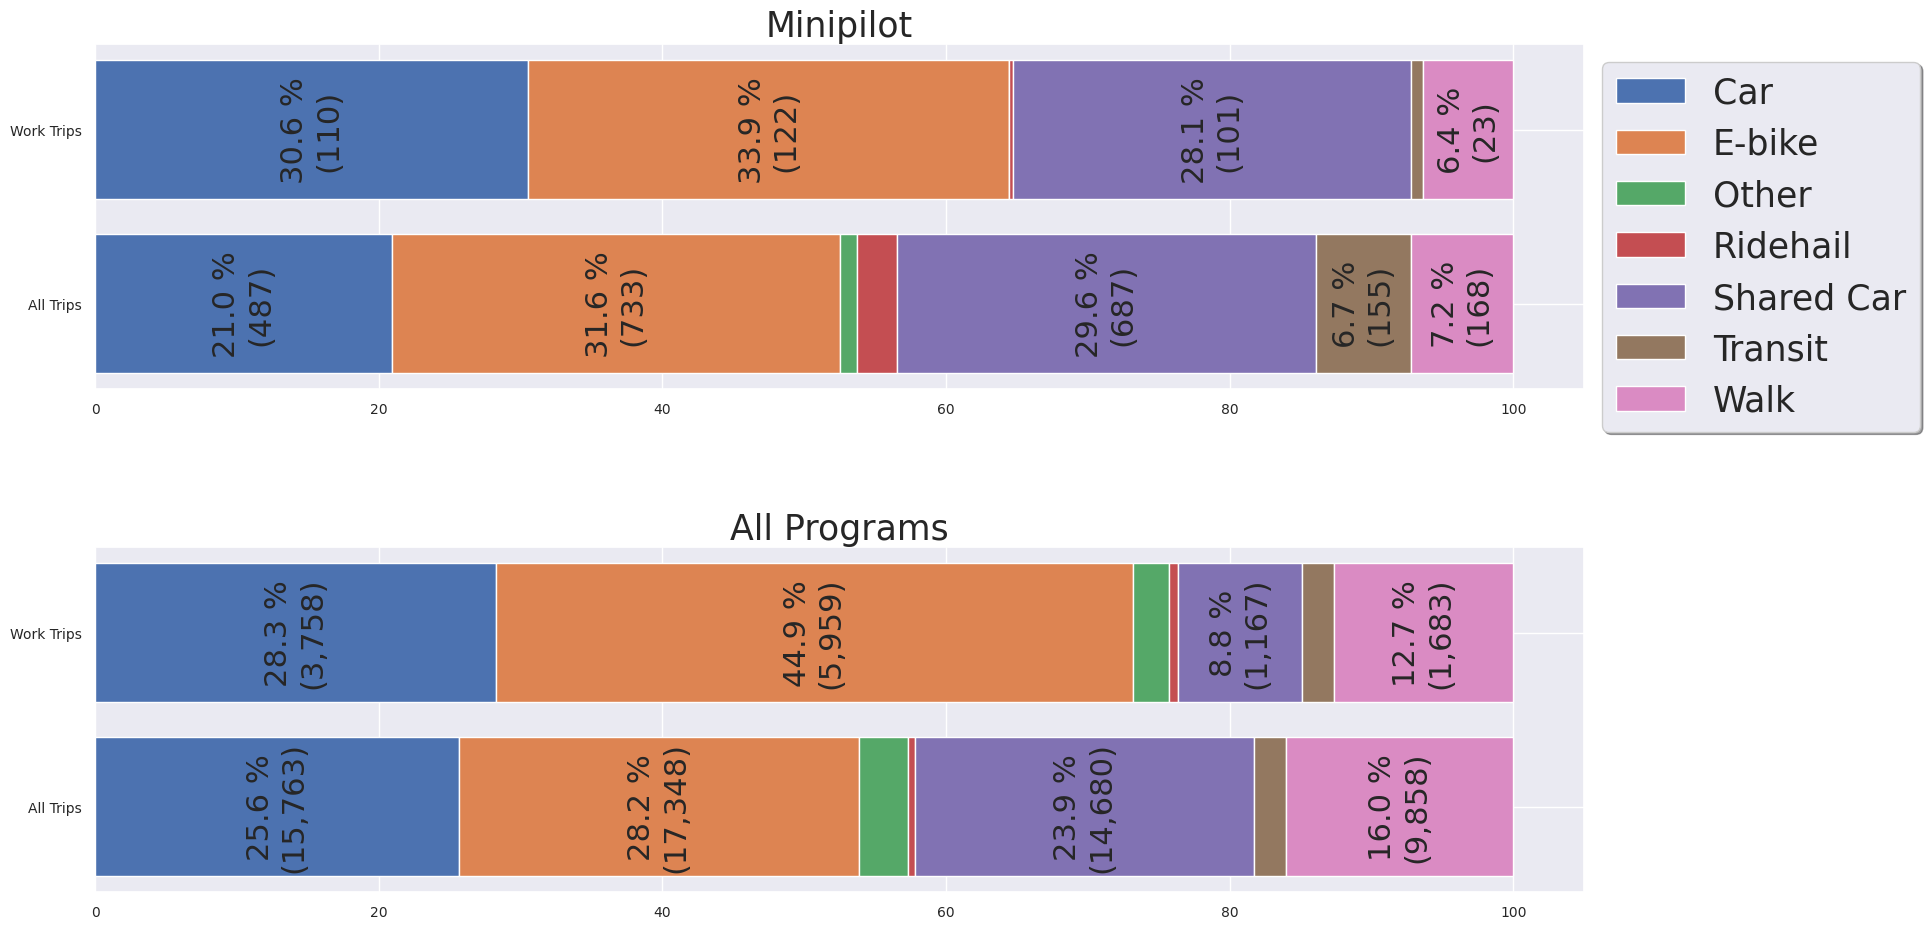

In [28]:
# make and save the chart

width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 30}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    bar_labels = mini['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=mode)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    bar_labels = long['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=mode)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=25)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.show()

## Mode Share by Program

figure 7 in the paper

In [29]:
# process the data for the clustered chart
data.program.unique()

array(['4c', 'cc', 'fc', 'pc', 'sc', 'vail'], dtype=object)

In [30]:
mode_data = data.copy()

#clean up the modes
mode_data.loc[mode_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
mode_data.loc[mode_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

program_list = ['4c', 'cc', 'fc', 'pc', 'sc', 'vail']
work_plot_data = []
all_plot_data = []
for program in program_list:
    program_data = mode_data[mode_data.program == program]

    t1 = program_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t1[program] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Mode_confirm')
    t1 = t1.drop(columns = ['distance_miles'])
    all_plot_data.append(t1)

    t2 = program_data[program_data['Trip_purpose']=='Work'].copy()
    t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t2[program] = (t2['distance_miles'] / np.sum(t2.distance_miles)) * 100
    t2 = t2.set_index('Mode_confirm')
    t2 = t2.drop(columns = ['distance_miles'])
    work_plot_data.append(t2)
    
work_trips = pd.concat(work_plot_data, axis = 1)
all_trips = pd.concat(all_plot_data, axis = 1)

all_trips = all_trips.transpose()
work_trips = work_trips.transpose()

all_trips['program'] = all_trips.index
all_trips = all_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
all_trips = all_trips.set_index('program')

work_trips['program'] = work_trips.index
work_trips = work_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
work_trips = work_trips.set_index('program')

In [31]:
##COLUMN ORDERS MUST MATCH OR CHART MISREPRESENTS DATA

all_trips

Mode_confirm,Car,E-bike,Other,Ridehail,Shared Car,Transit,Walk
program,,,,,,,
Four Corners\n(Durango),9.687500,54.732143,4.732143,0.089286,24.196429,0.580357,5.982143
Comunity Cycles\n(Boulder),18.237843,31.513658,4.600215,0.433382,21.259592,4.226472,19.728838
Fort Collins,27.674550,31.015390,2.374249,0.056306,22.738363,0.394144,15.746997
Pueblo,35.522979,26.537242,1.283677,0.103011,28.708399,0.253566,7.591125
Smart Commute\n(Denver North),26.922487,11.803530,3.069839,2.931696,30.099770,0.567920,24.604758
Vail,41.098748,17.918405,5.771905,0.069541,18.173389,4.844692,12.123319


In [32]:
work_trips['Ridehail'] = work_trips['Ridehail'].fillna(0)
work_trips['Transit'] = work_trips['Transit'].fillna(0)
work_trips = work_trips[['Car', 'E-bike', 'Other', 'Ridehail', 'Shared Car', 'Transit', 'Walk']]

work_trips

Mode_confirm,Car,E-bike,Other,Ridehail,Shared Car,Transit,Walk
program,,,,,,,
Four Corners\n(Durango),6.226415,78.867925,1.509434,0.000000,12.264151,0.000000,1.132075
Comunity Cycles\n(Boulder),22.059954,54.938509,3.497310,0.403536,5.591852,4.016141,9.492698
Fort Collins,32.752263,42.507543,3.151190,0.000000,9.654710,0.335233,11.599061
Pueblo,51.745898,33.824148,0.420698,0.084140,7.909129,0.042070,5.973917
Smart Commute\n(Denver North),13.959234,21.680049,2.532427,3.520692,16.924027,0.432366,40.951204
Vail,25.307557,45.518453,0.702988,0.000000,10.720562,12.126538,5.623902


### make and save the clustered chart

In [33]:
#from https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title, fontsize = 22)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

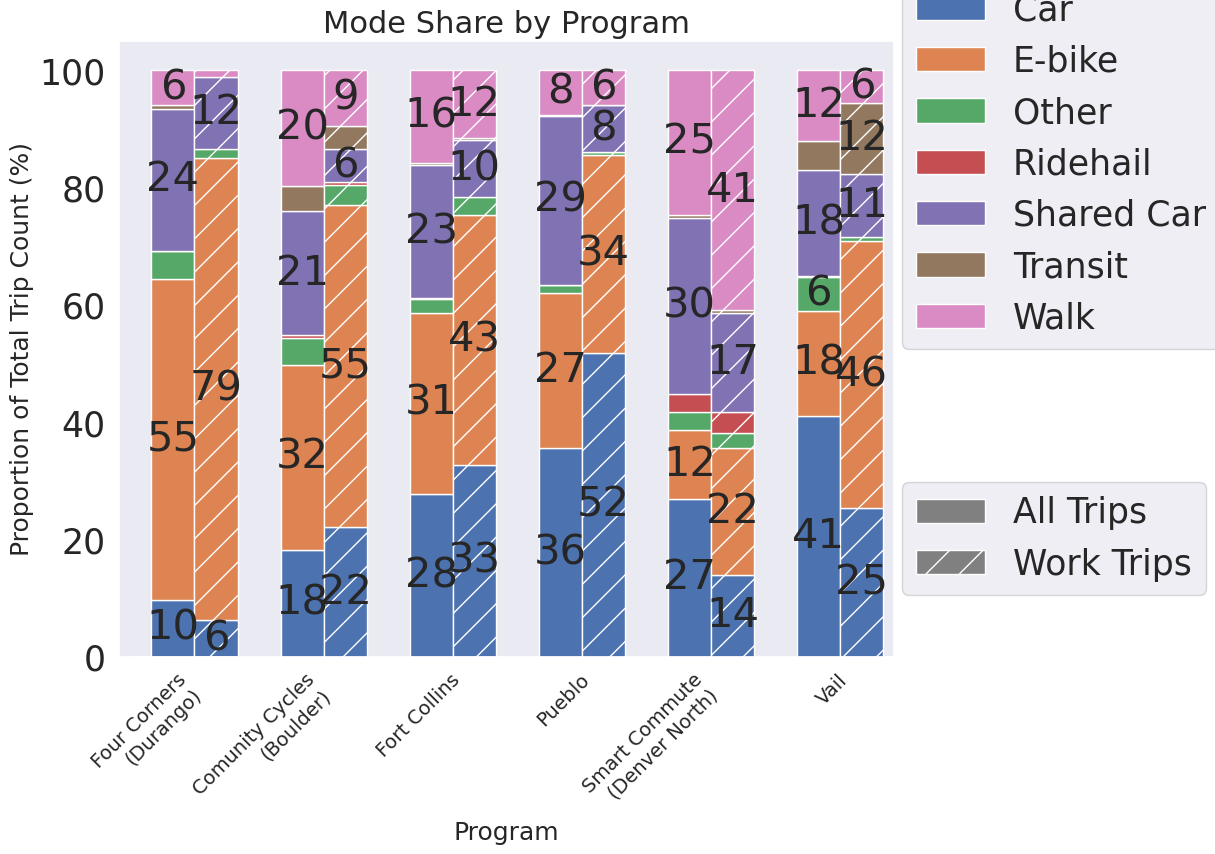

In [34]:
# Then, just call :
ax = plot_clustered_stacked([all_trips, work_trips],["All Trips", "Work Trips"], title = "Mode Share by Program")

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(all_trips.index, rotation=45, ha='right', fontsize=14)

ax.set_xlabel('Program', fontsize = 18)
ax.set_ylabel('Proportion of Total Trip Count (%)', fontsize = 18)

plt.savefig("CanBikeCO_report_mode_share_overview.jpeg", bbox_inches='tight')

## Trip Purpose Mini vs Full

figure 8 in the paper

In [35]:
#arrange the data
full_purpose_data = data.copy()
mini_purpose_data = MINI_DATA.copy()

#MINI DATA
mini_data = mini_purpose_data.copy()
mini_data = mini_data[~mini_data['Trip_purpose'].isin(['No travel'])]
mini_data.loc[mini_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
mini_data.loc[mini_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'

t1 = mini_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip type'] = 'All Trips'

t2 = mini_data[mini_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip type'] = 'E-Bike Trips'

mini_data = pd.concat([t1,t2])
mini_data['Dataset'] = 'Minipilot'
mini_data.columns = ['Purpose','Count','Proportion','Trip Type', "Dataset"]

#FULL DATA
plot_data = full_purpose_data.copy()
plot_data.loc[plot_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
plot_data.loc[plot_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'
t1 = plot_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip type'] = 'All Trips'
t1.loc[len(t1.index)] = ['Pick-up/Drop off', 0, 0, 'All Trips']

t2 = plot_data[plot_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip type'] = 'E-Bike Trips'
t2.loc[len(t2.index)] = ['Pick-up/Drop off', 0, 0, 'E-Bike Trips']

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Purpose','Count','Proportion','Trip Type', "Dataset"]

plot_data = pd.concat([plot_data, mini_data])
# plot_data

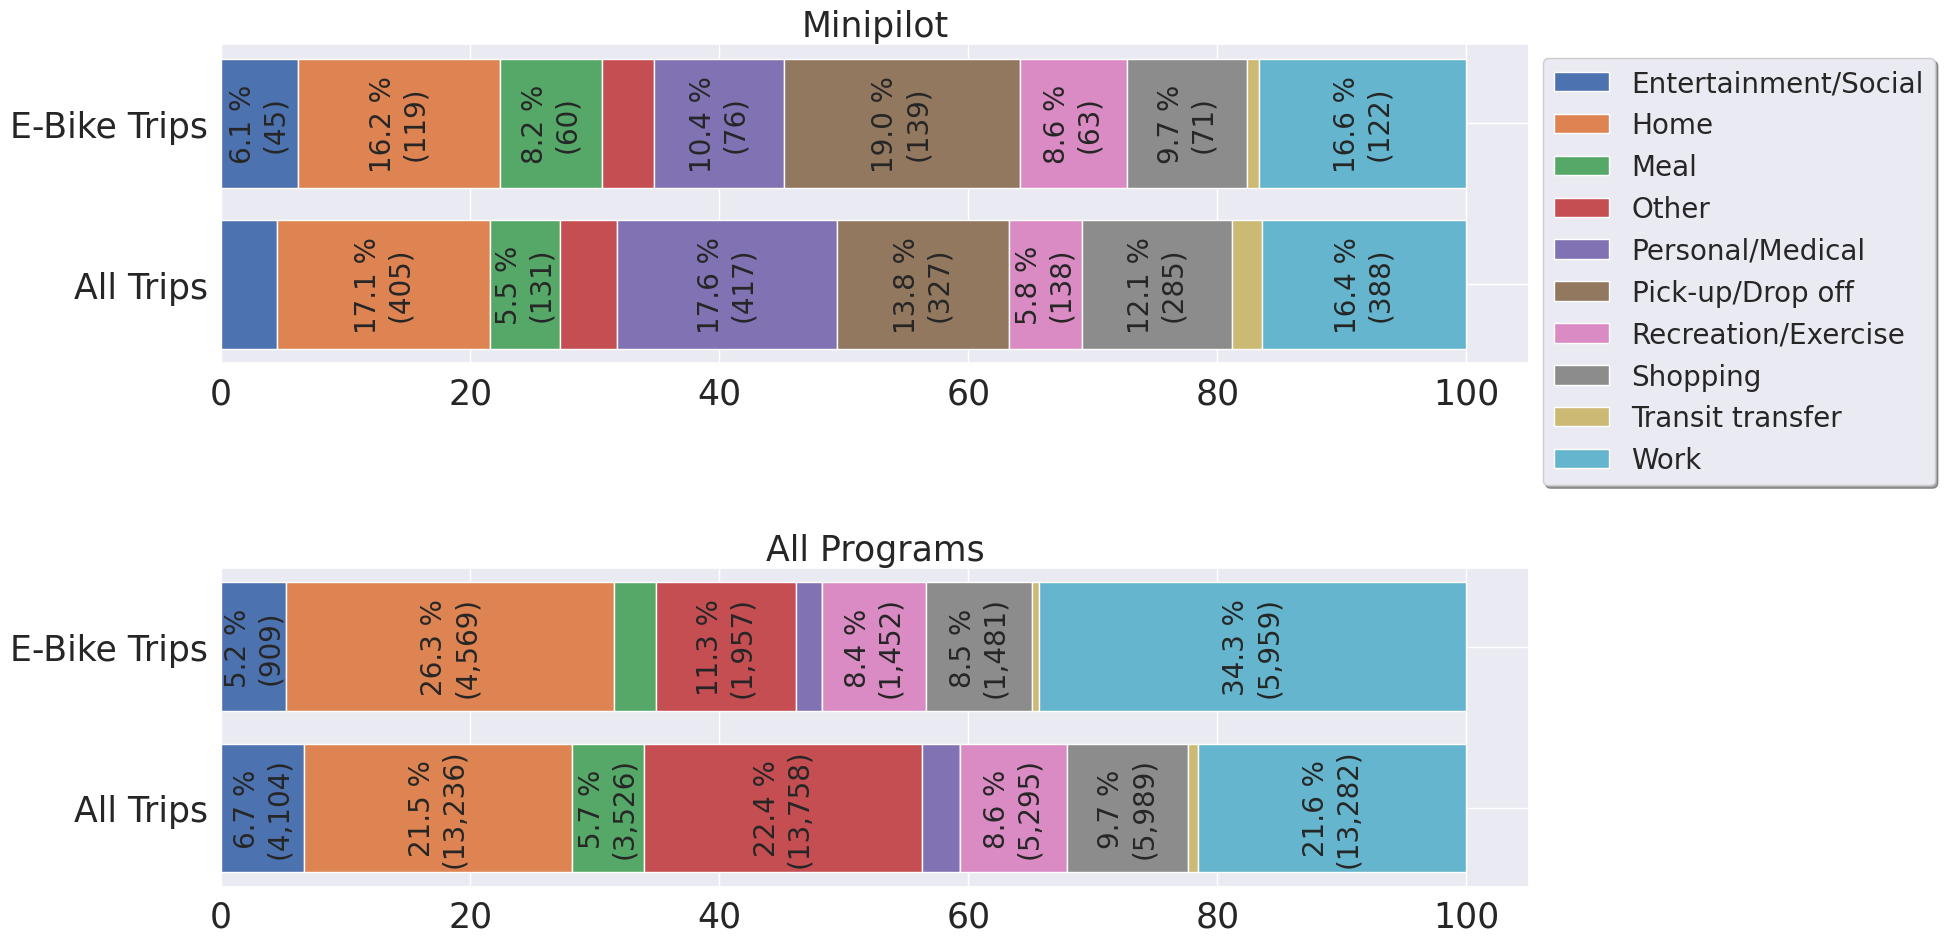

In [36]:
# create the chart

width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 25}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for purp in pd.unique(fig_data_mini.Purpose):
    mini = fig_data_mini[fig_data_mini['Purpose']==purp]
    long = fig_data_long[fig_data_long['Purpose']==purp]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    bar_labels = mini['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=purp)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=20)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    bar_labels = long['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=purp)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=20)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.savefig("CanBikeCO_report_purp_share.jpeg")
plt.show()

## Show what purposes diffrent programs used the e-bikes for

figure 9 in the paper

In [37]:
full_purpose_data = data.copy()
e_purpose = full_purpose_data[full_purpose_data.Mode_confirm == 'E-bike']

e_purpose.loc[e_purpose['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
e_purpose.loc[e_purpose['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'

program_list = ['4c', 'cc', 'fc', 'pc', 'sc', 'vail']
all_plot_data = []
for program in program_list:
    program_data = e_purpose[mode_data.program == program]

    t1 = program_data.groupby(['Trip_purpose'], as_index=False).sum()[['Trip_purpose','distance_miles']]
    t1['distance_miles'].fillna(0, inplace=True)
    t1[program] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Trip_purpose')
    t1 = t1.drop(columns = ['distance_miles'])
    all_plot_data.append(t1)
    
all_trips = pd.concat(all_plot_data, axis = 1)

all_trips = all_trips.transpose()

all_trips['program'] = all_trips.index
all_trips = all_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
all_trips = all_trips.set_index('program')
# all_trips = all_trips.drop(columns=['Trip_purpose'])

all_trips

/tmp/ipykernel_21/3120951855.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  program_data = e_purpose[mode_data.program == program]
/tmp/ipykernel_21/3120951855.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t1 = program_data.groupby(['Trip_purpose'], as_index=False).sum()[['Trip_purpose','distance_miles']]
/tmp/ipykernel_21/3120951855.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  program_data = e_purpose[mode_data.program == program]
/tmp/ipykernel_21/3120951855.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t1 = program_

Trip_purpose,Entertainment/Social,Home,Meal,Other,Personal/Medical,Recreation/Exercise,Shopping,Transit transfer,Work
program,,,,,,,,,
Four Corners\n(Durango),3.350406,33.631181,4.343044,8.716938,0.237130,5.012298,9.169886,0.170986,35.368130
Comunity Cycles\n(Boulder),3.196050,31.032284,2.898926,9.635477,1.789716,10.150997,5.976961,0.523261,34.796328
Fort Collins,2.182344,27.295081,2.067012,11.727759,2.502932,7.898888,9.947937,0.684368,35.693678
Pueblo,21.465674,12.907053,2.325854,15.152311,4.131477,24.364485,5.881472,0.408723,13.362951
Smart Commute\n(Denver North),2.324331,35.126383,1.852444,2.791532,0.375686,4.565950,2.674597,0.135057,50.154019
Vail,3.251829,32.426163,5.338610,13.396808,0.985428,5.274282,6.361933,0.506718,32.458230


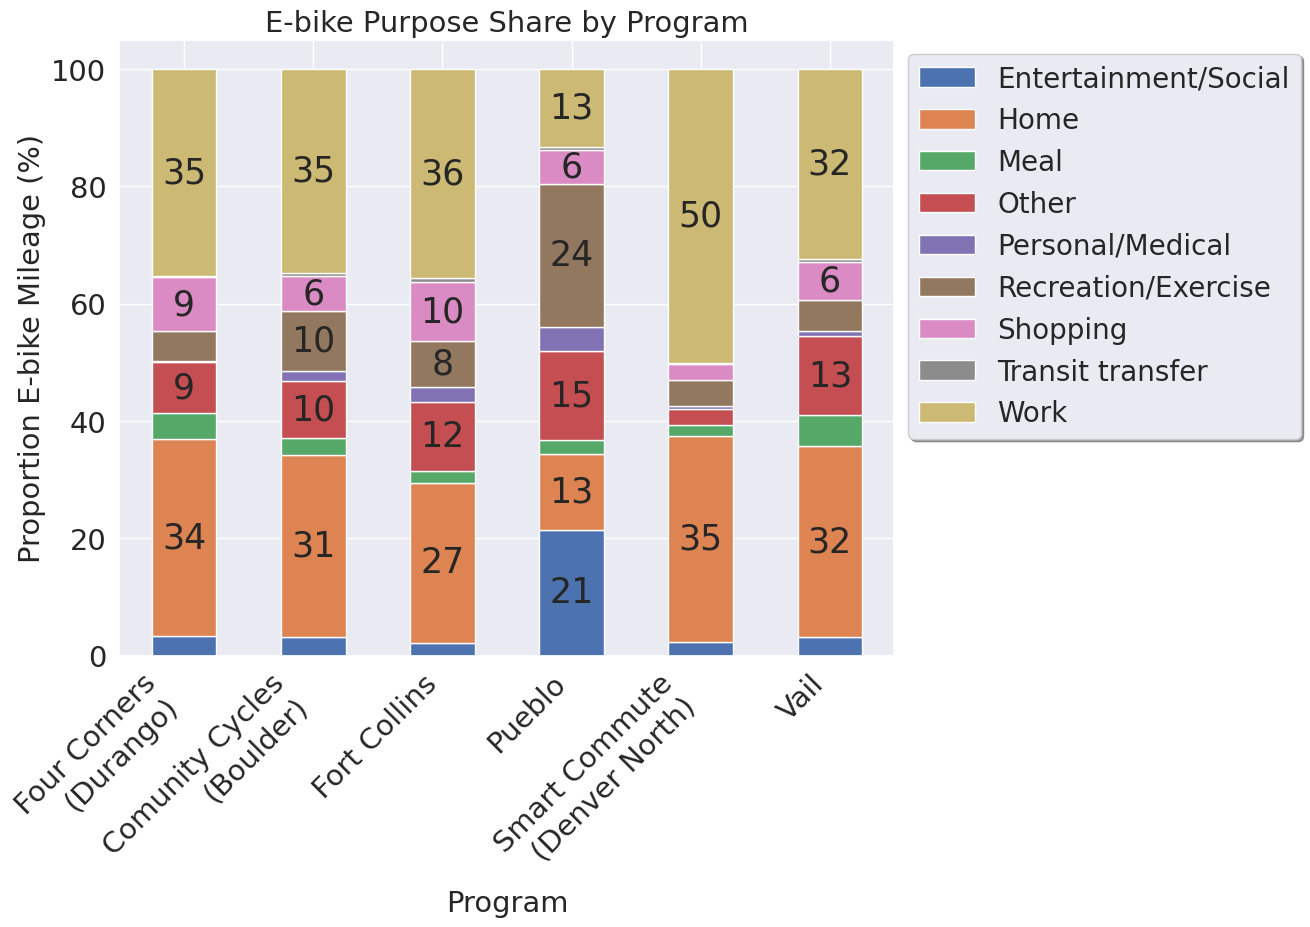

In [38]:
#https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
ax = all_trips.plot.bar(stacked=True, 
                        title="E-bike Purpose Share by Program", 
                        ylabel="Proportion E-bike Mileage (%)",
                        xlabel = "Program",
                        rot = 45)

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5.5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_xticklabels(all_trips.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)

plt.savefig("CanBikeCO_report_ebike_programs_purp_share.jpeg", bbox_inches='tight')


## Mode share by age

figure 11 in the paper

In [35]:
mode_data = data.copy() #complete set of cleaned data

age_counts = mode_data.groupby(['AGE'], as_index=False).count()[['AGE', 'user_id']]

,AGE,user_id
0,19,863
1,22,78
2,23,784
3,24,2317
4,25,446
5,26,211
6,27,687
7,28,2549
8,29,535
9,30,288


In [91]:
bins = [18, 30, 42, 54, 66]
mode_data['age_bin'] = pd.cut(mode_data['AGE'], bins)


In [92]:
age_modes = mode_data.groupby(['age_bin', 'Mode_confirm'], as_index=False).count()[['age_bin', 'Mode_confirm','distance_miles']]
age_modes['proportion'] = age_modes['distance_miles'] / np.sum(age_modes.distance_miles)

list_age_modes = []
for age_bin in age_modes.age_bin.unique():
    age_data = mode_data[mode_data['age_bin'] == age_bin]

    t1 = age_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t1['distance_miles'].fillna(0, inplace=True)
    t1[age_bin] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Mode_confirm')
    t1 = t1.drop(columns = ['distance_miles'])
    list_age_modes.append(t1)
        
age_modes = pd.concat(list_age_modes, axis = 1)

age_modes = age_modes.transpose()

age_modes = age_modes.fillna(0)

age_modes

Mode_confirm,Car,E-bike,Other,Personal Micromobility,Ridehail,Shared Car,Shared Micromobility,Transit,Walk
"(18, 30]",10.927152,33.238182,3.448276,2.706097,0.182690,26.375885,0.616579,3.596712,18.908427
"(30, 42]",24.981117,25.348486,2.389618,1.442011,0.878940,25.279819,0.233468,2.379317,17.067225
"(42, 54]",24.679417,32.959625,0.534916,1.179746,0.322415,26.679856,0.073276,2.601304,10.969444
"(54, 66]",41.617135,26.111908,0.348432,0.655872,0.051240,13.435130,0.051240,0.338184,17.390859


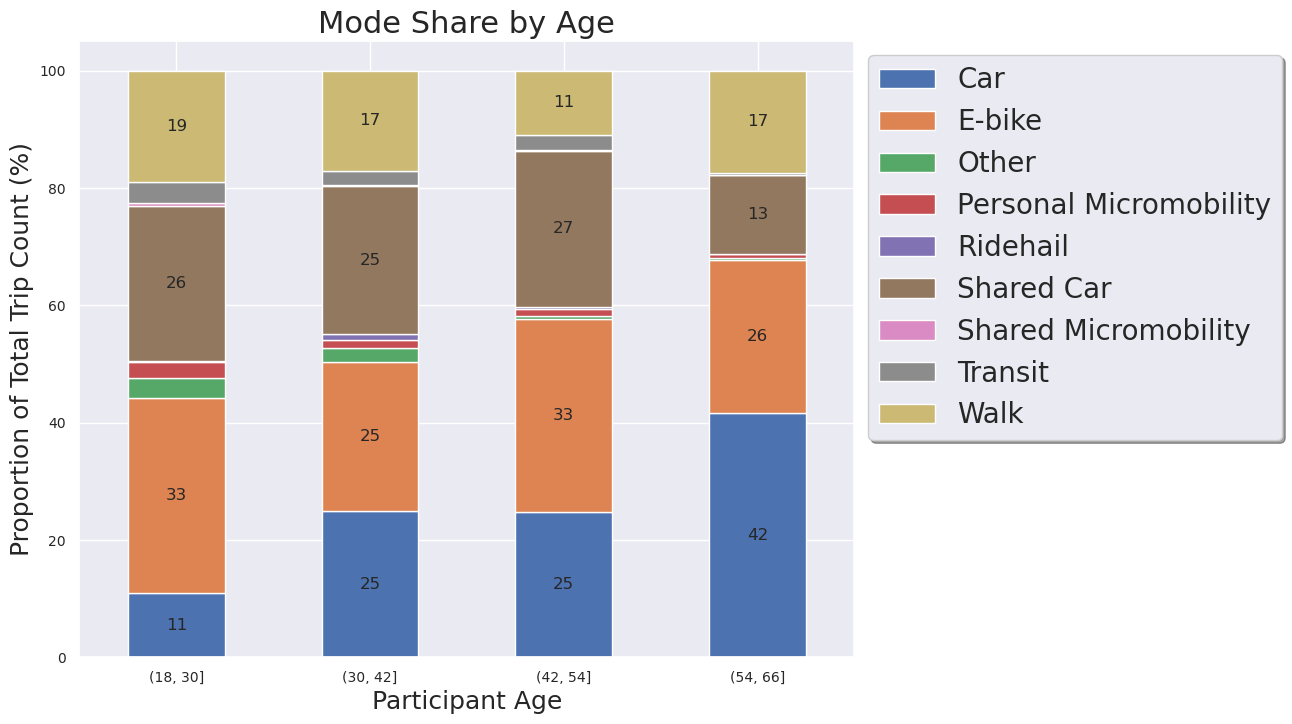

In [95]:
#https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
ax = age_modes.plot.bar(stacked=True, 
                        title="Mode Share by Age", 
                        ylabel="Proportion of Total Trip Count (%)",
                        xlabel = "Participant Age",
                        rot = 0)

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5.5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# ax.set_xticklabels(age_modes.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)

ax.set_xlabel("Participant Age", fontsize = 18)
ax.set_ylabel("Proportion of Total Trip Count (%)", fontsize = 18)
ax.set_title("Mode Share by Age", fontsize = 22)

plt.savefig("CanBikeCO_report_age_mode_share.jpeg", bbox_inches='tight')

## e-bike distances by program

figure 5 in the paper

In [43]:
expanded_ct = pd.read_csv('expanded_ct.csv')

len(expanded_ct)

/tmp/ipykernel_21/3005360896.py:1: DtypeWarning: Columns (67,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  expanded_ct = pd.read_csv('expanded_ct.csv')


81547

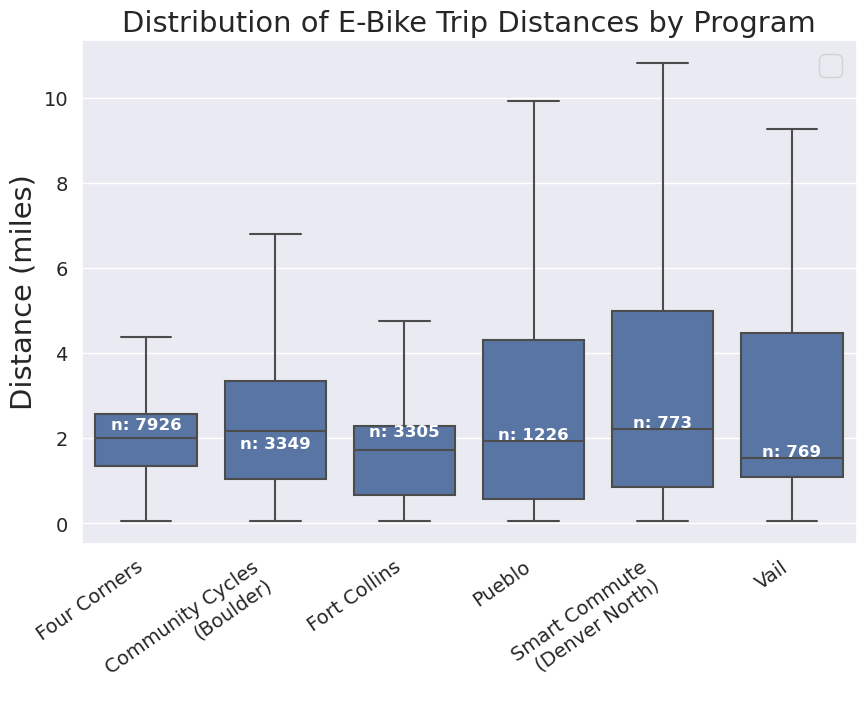

In [62]:
# Distribution of distances by program
plot_data = data.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles\n(Boulder)','Fort Collins','Pueblo','Smart Commute\n(Denver North)','Vail'])

plot_title = 'Distribution of E-Bike Trip Distances by Program'
ylab = 'Distance (miles)'

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax=ax, data=plot_data, x='Program', y='distance_miles', hue='Mode_confirm', showfliers=False).set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend([])

# Calculate number of obs per group & median to position labels
medians = plot_data.groupby(['Program'])['distance_miles'].median().values
nobs = plot_data['Program'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='12',
            color='w',
            weight='semibold')
 
plt.savefig("CanBikeCO_report_e-bike_miles_dist.jpeg", bbox_inches='tight')

## E-bike trips across occuptations

figures 13 and 26

In [45]:
data = data.copy()
data['occupation_cat'] = data['Which best describes your primary job?'].replace(['Sales or service',
                                                                                 'Manufacturing, construction, maintenance, or farming',                                                                            
                                                                                 'Janitorial',
                                                                                 'Professional, managerial, or technical',
                                                                                 'Clerical or administrative support',
                                                                                 'Teacher',
                                                                                 'Medical',
                                                                                 'CNA',
                                                                                 'Restaurant manager',
                                                                                 'Co op laundry',
                                                                                 'Cook',
                                                                                 'Nurse',
                                                                                 'Dining Services',
                                                                                 'Security',
                                                                                 'Food service',
                                                                                 'Csu custodian',
                                                                                 'Residential Dining Services',
                                                                                 'education/early childhood',
                                                                                 'Inbound cs',
                                                                                 'Custodial Maintanace',
                                                                                 'Amazon',
                                                                                 'Custodian',
                                                                                 'Hockey rink',
                                                                                 'Pastry chef and line cook',                                                                                 
                                                                                 'Cooking',
                                                                                 'Education non-profit manager',
                                                                                 'Healthcare',
                                                                                 'Chef',
                                                                                 'Accounting Technician',
                                                                                 'Caregiver/ Qmap',
                                                                                 'Caregiver',
                                                                                 'Health care',
                                                                                 'Medical field'],
                                                                                ['Sales or Service',
                                                                                 'Manufacturing, Construction, Maintenance, or Farming',
                                                                                 'Custodial',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Clerical or Administrative Support',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare'])
data['occupation_cat'].unique()

array(['Sales or Service', 'Food Service', 'Cooking ',
       'Medical/Healthcare', 'Clerical or Administrative Support',
       'Accounting Technician ',
       'Manufacturing, Construction, Maintenance, or Farming',
       'Professional, Managerial, or Technical', 'Education',
       'Education ', 'Csu custodian ', 'Custodial ', 'Custodial', nan,
       'Maintenance ', 'Maintenance', 'Janitorial ', 'Amazon ',
       'Custodial Maintanace ', 'Hockey rink '], dtype=object)

In [46]:
data['occupation_cat']= data['occupation_cat'].replace(['Food Service', 'Cooking ', 'Accounting Technician ','Education ',
                                                       'Csu custodian ','Custodial ','Maintenance ','Maintenance','Janitorial ',
                                                       'Amazon ', 'Custodial Maintanace ', 'Hockey rink '],
                                                      ['Sales or Service' , 'Sales or Service', 'Professional, Managerial, or Technical',
                                                      'Education', 'Custodial', 'Custodial', 'Custodial', 'Custodial', 'Custodial',
                                                      'Sales or Service','Custodial' ,'Sales or Service'])

data['occupation_cat'] = data['occupation_cat'].replace(['Manufacturing, Construction, Maintenance, or Farming', 'Professional, Managerial, or Technical', 'Clerical or Administrative Support'],
                                                        ['Manufacturing, Construction,\nMaintenance, or Farming', 'Professional, Managerial,\nor Technical', 'Clerical or\nAdministrative Support'])
data['occupation_cat'].unique()

array(['Sales or Service', 'Medical/Healthcare',
       'Clerical or\nAdministrative Support',
       'Professional, Managerial,\nor Technical',
       'Manufacturing, Construction,\nMaintenance, or Farming',
       'Education', 'Custodial', nan], dtype=object)

In [47]:
plot_data_1=data[data['occupation_cat'].notnull()]

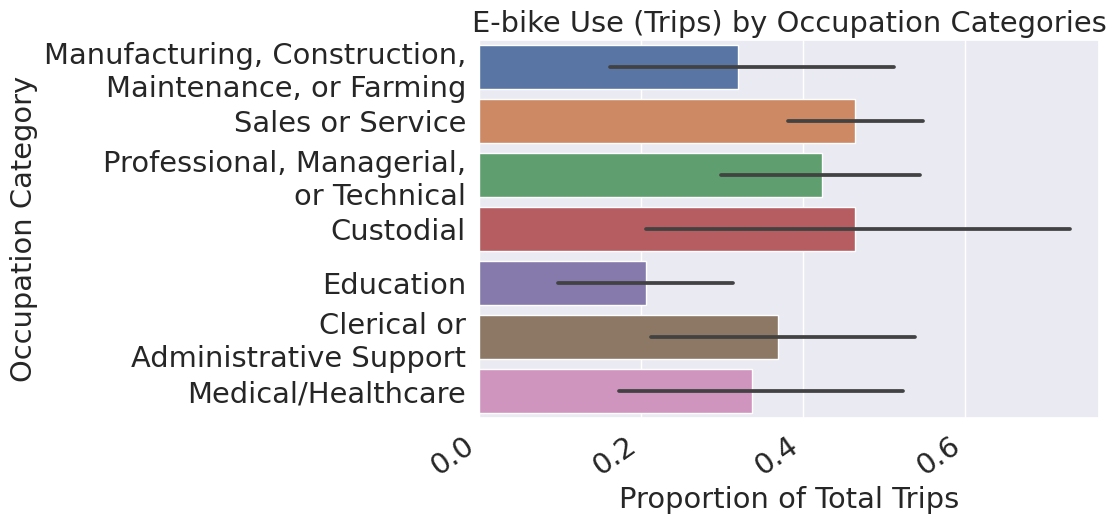

In [48]:
# proportion of trips by occupation
plot_data = plot_data_1.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['occupation_cat','user_id'], as_index=False).nth(0)[['occupation_cat','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'E-bike Use (Trips) by Occupation Categories'
ylab='Occupation Category'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= plot_data, x='proportion' , y='occupation_cat', estimator=np.mean).set(title=plot_title,xlabel='Proportion of Total Trips',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.savefig("CanBikeCO_report_occ_ebike_trips.jpeg", bbox_inches='tight')

In [49]:
data['induced']=np.where(data['Replaced_mode']=='No Travel', 'Induced', 'Non-induced')

In [50]:
data['Program'] = data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

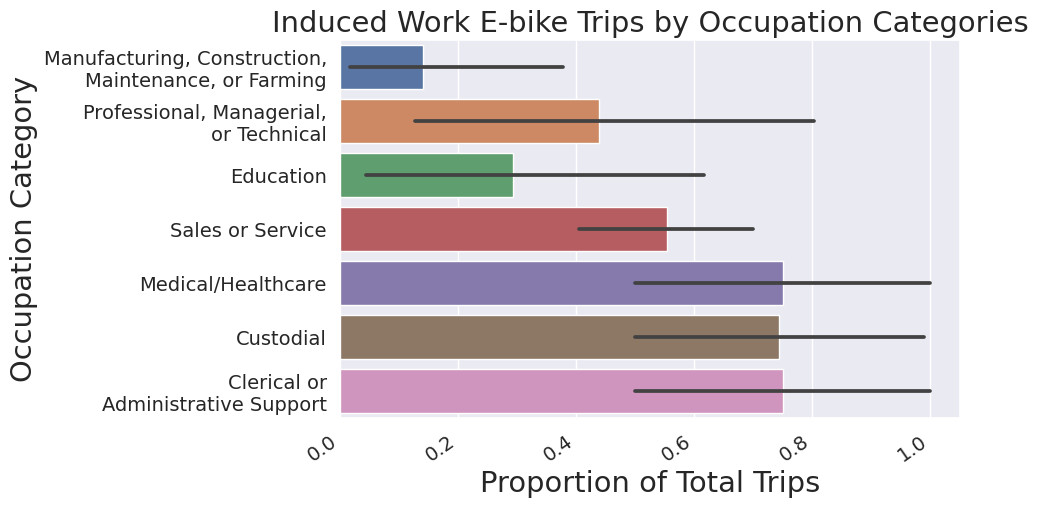

In [59]:
# proportion of induced trips by occupation
plot_data = data.copy()
plot_data = plot_data[(plot_data['induced']=='Induced') & (plot_data['Trip_purpose']=='Work')]

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['occupation_cat','user_id'], as_index=False).nth(0)[['occupation_cat','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'Induced Work E-bike Trips by Occupation Categories'
ylab='Proportion of Total Trips'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= plot_data, x='proportion' , y='occupation_cat', estimator=np.mean).set(title=plot_title,xlabel=ylab,ylabel='Occupation Category')
plt.xticks(rotation=35, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.25)

plt.savefig("CanBikeCO_report_occ_induced_ebike_trips.jpeg", bbox_inches='tight')